# Placement Prediction

### Import all the modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
placement_df = pd.read_excel("Book1.xlsx")

In [3]:
placement_df.head(10)

,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,NaN,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,NaN,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,NaN,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,NaN,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,NaN,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,NaN,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,NaN,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,NaN,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,NaN,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,NaN,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [4]:
placement_df = placement_df.drop(['Unnamed: 0'], axis=1)

In [5]:
placement_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### EDA , Feature Engineering and Data Visualization on Uncleaned Data

In [6]:
placement_df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

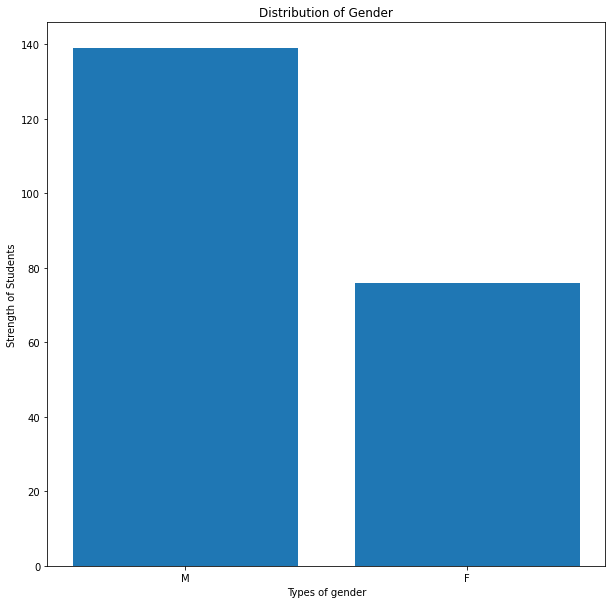

In [7]:
plt.figure(figsize=(10,10))
plt.bar(placement_df['gender'].value_counts().keys(),placement_df['gender'].value_counts())
plt.title('Distribution of Gender')
plt.xlabel('Types of gender')
plt.ylabel('Strength of Students')
plt.show()

In [8]:
placement_df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

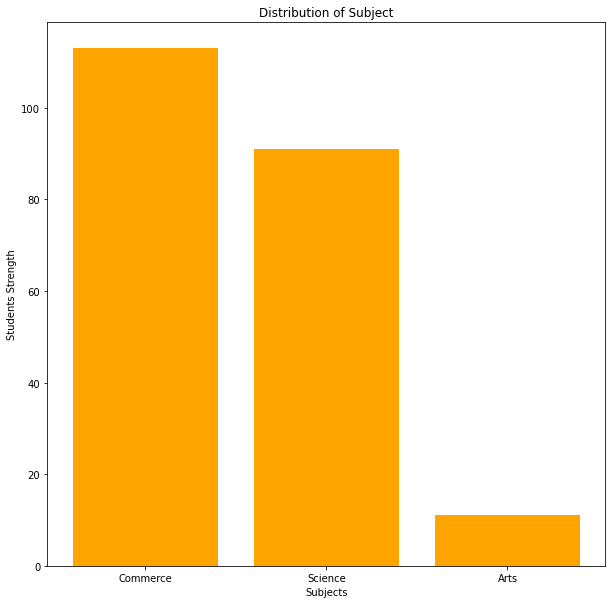

In [9]:
plt.figure(figsize=(10,10))
plt.bar(placement_df['hsc_s'].value_counts().keys(),placement_df['hsc_s'].value_counts(),color='orange')
plt.title('Distribution of Subject')
plt.xlabel('Subjects')
plt.ylabel('Students Strength')
plt.show()

In [10]:
placement_df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

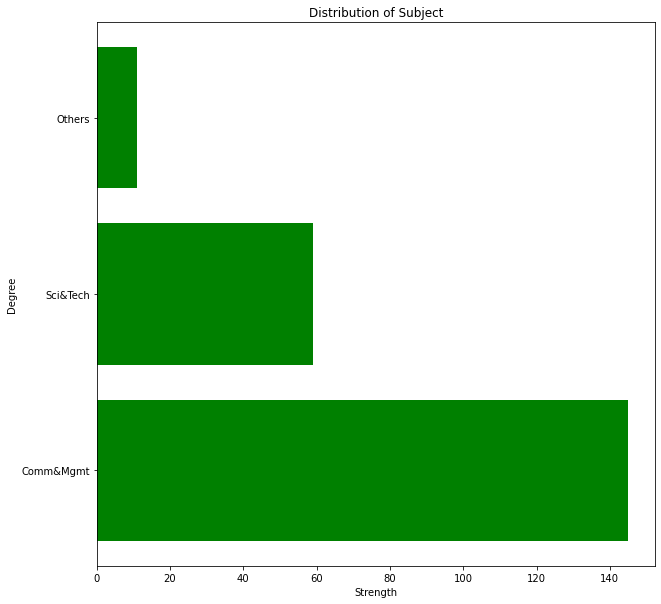

In [11]:
plt.figure(figsize=(10,10))
plt.barh(placement_df['degree_t'].value_counts().keys(),placement_df['degree_t'].value_counts(),color='green')
plt.title('Distribution of Subject')
plt.xlabel('Strength')
plt.ylabel('Degree')
plt.show()

In [12]:
placement_df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

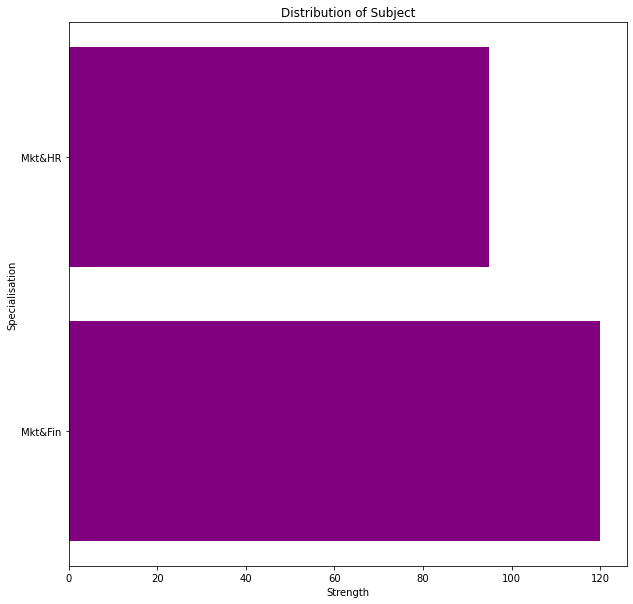

In [13]:
plt.figure(figsize=(10,10))
plt.barh(placement_df['specialisation'].value_counts().keys(),placement_df['specialisation'].value_counts(),color='purple')
plt.title('Distribution of Subject')
plt.xlabel('Strength')
plt.ylabel('Specialisation')
plt.show()

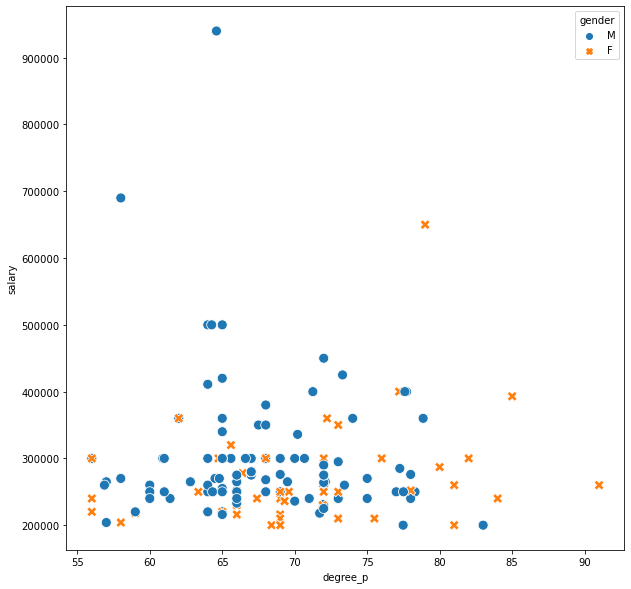

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='degree_p',y='salary',data=placement_df,hue='gender',style='gender',s=100)
plt.show()

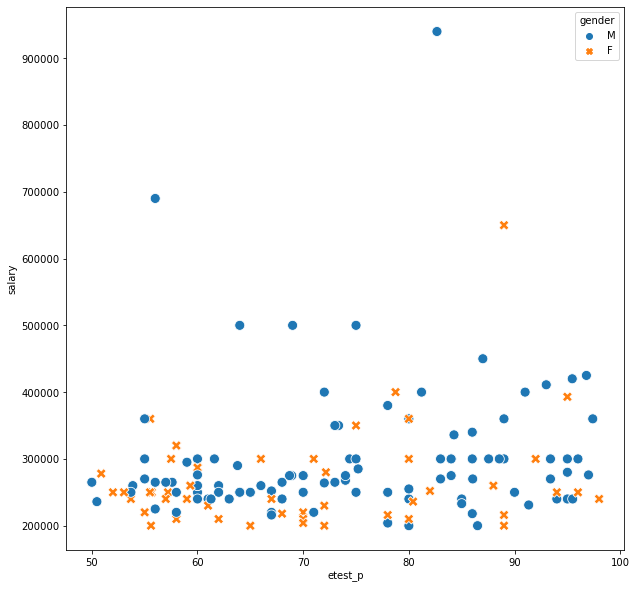

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='etest_p',y='salary',data=placement_df,hue='gender',style='gender',s=100)
plt.show()

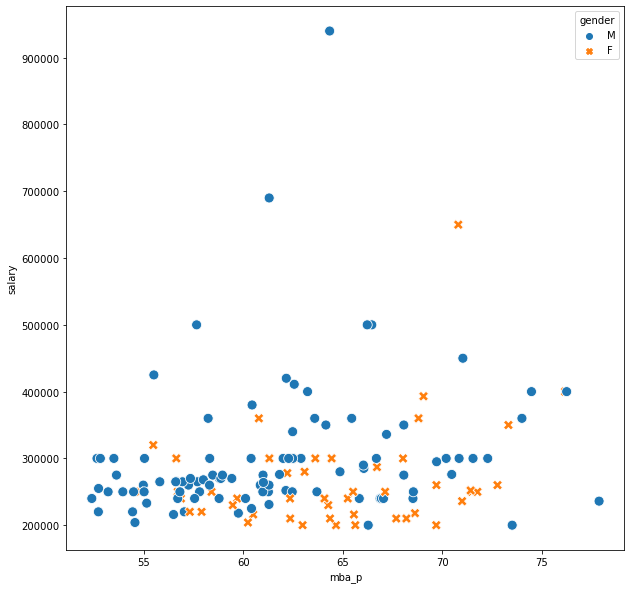

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='mba_p',y='salary',data=placement_df,hue='gender',style='gender',s=100)
plt.show()

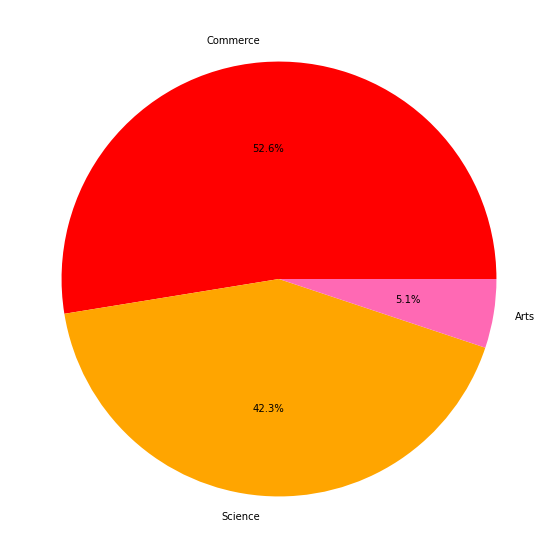

In [17]:
plt.figure(figsize=(10,10))
plt.pie(placement_df['hsc_s'].value_counts(),labels=placement_df['hsc_s'].value_counts().keys(),autopct='%0.1f%%',colors=['red','orange','hotpink'])
plt.show()

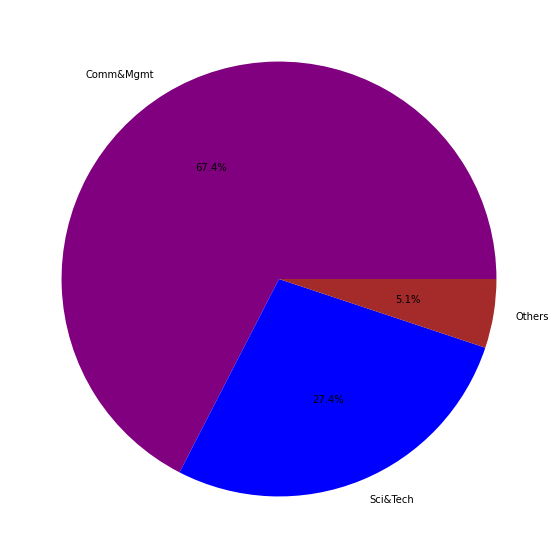

In [18]:
plt.figure(figsize=(10,10))
plt.pie(placement_df['degree_t'].value_counts(),labels=placement_df['degree_t'].value_counts().keys(),autopct='%0.1f%%',colors=['purple','blue','brown'])
plt.show()

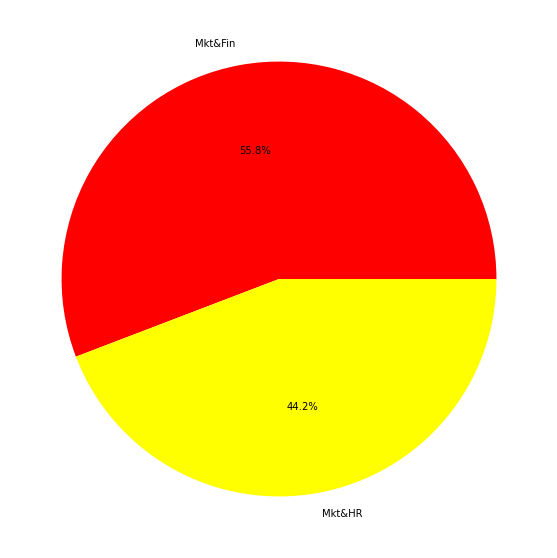

In [19]:
plt.figure(figsize=(10,10))
plt.pie(placement_df['specialisation'].value_counts(),labels=placement_df['specialisation'].value_counts().keys(),autopct='%0.1f%%',colors=['red','yellow'])
plt.show()

### Data Cleaning and Data Visualization on Cleaned Data

In [20]:
placement_df['salary'].describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

In [21]:
placement_df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [22]:
placement_copy=placement_df.copy()

In [23]:
placement_copy.shape

(215, 15)

In [24]:
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [25]:
placement_copy.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [26]:
placement_copy['salary'].fillna(value=0 , inplace = True )

In [27]:
placement_copy.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [28]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1 , inplace = True)

In [29]:
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Employability Percentage')

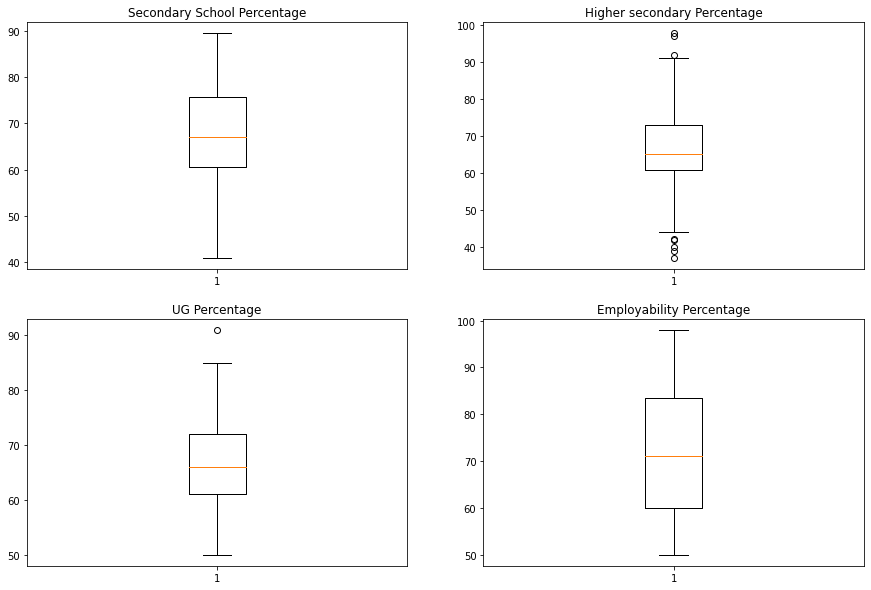

In [30]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability Percentage')

In [31]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p']<= Q3+ 1.5*IQR)
placement_filtered= placement_copy.loc[filter]

# Graph Without Any Outliers

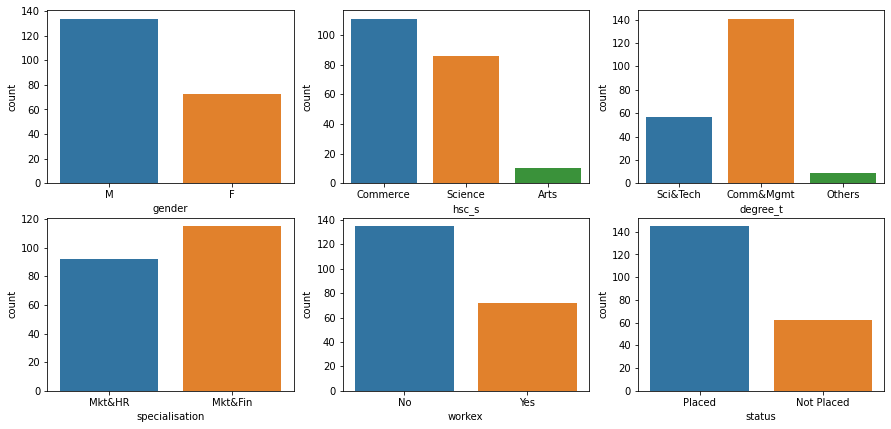

In [32]:
plt.figure(figsize = (15,7))
plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = placement_filtered)
plt.subplot(232)
ax = sns.countplot(x= 'hsc_s' , data = placement_filtered)
plt.subplot(233)
ax = sns.countplot(x= 'degree_t' , data = placement_filtered)
plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = placement_filtered)
plt.subplot(235)
ax = sns.countplot(x= 'workex' , data = placement_filtered)
plt.subplot(236)
ax = sns.countplot(x= 'status' , data = placement_filtered)

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

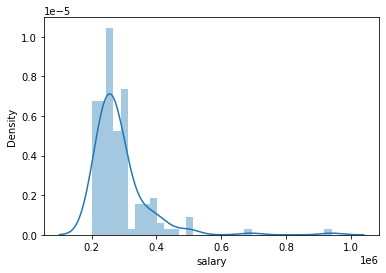

In [33]:
placement_placed = placement_filtered[placement_filtered.salary!= 0]
sns.distplot(placement_placed['salary'])

# Model Building

In [34]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

object_cols= ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()

for col in object_cols:
    placement_filtered[col]= label_encoder.fit_transform(placement_filtered[col])
    
placement_filtered.head(10)

C:\Users\mohan\AppData\Local\Temp\ipykernel_15040\1209884044.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placement_filtered[col]= label_encoder.fit_transform(placement_filtered[col])


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.00,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.50,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.00,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.00,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.80,0,55.50,1,425000.0
5,1,55.00,49.80,Science,67.25,Sci&Tech,1,55.00,0,51.58,0,0.0
6,0,46.00,49.20,Commerce,79.00,Comm&Mgmt,0,74.28,0,53.29,0,0.0
7,1,82.00,64.00,Science,66.00,Sci&Tech,1,67.00,0,62.14,1,252000.0
8,1,73.00,79.00,Commerce,72.00,Comm&Mgmt,0,91.34,0,61.29,1,231000.0
9,1,58.00,70.00,Commerce,61.00,Comm&Mgmt,0,54.00,0,52.21,0,0.0


In [35]:
dummy_hsc_s = pd.get_dummies(placement_filtered['hsc_s'], prefix = 'dummy')
dummy_degree_t = pd.get_dummies(placement_filtered['degree_t'], prefix = 'dummy')

placement_coded = pd.concat([placement_filtered , dummy_hsc_s , dummy_degree_t],axis = 1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis = 1 , inplace = True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [36]:
X = placement_coded.drop(['status'],axis=1)
y = placement_coded.status

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.60 , random_state = 1)

In [38]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test , y_test))

0.8313253012048193


In [39]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)
dt = dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.7951807228915663


In [40]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators = 100)
rt.fit(X_train , y_train)
y_pred = rt.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.8674698795180723


In [41]:
# Random Forest Classifier performs the best out of the three #